# sound_effects
We can analyze sound effects to gather clues about a scene's location and context. The sounds of crickets usually accompany establishing shots of nighttime scenes. Church bells, school bells, and fire alarm bells are all related, but indicate three separate locations.

In [1]:
import librosa
from librosa.display import waveplot, specshow
import matplotlib.pyplot as plt
import numpy as np

First, we'll take a look at the very famous, very recognizable sound effect of a truck passing by. It's formally known as Truck By Short Dopple TE047603, and listenable at this link: https://www.audiomicro.com/vehicle-trucks-bys-truck-by-short-dopple-te047603-sound-effects-130704

In [2]:
audio_file = ('../extracted_audio/effects/semi_truck_horn.m4a')

In [3]:
y, sr = librosa.load(audio_file)

/home/collect/anaconda3/envs/moviegoer/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


This sound effect has two components: the approaching sound, and then the departing sound. The departing sound is heavily affected by the Doppler Effect, the tendency for a sound source moving away from the observer to drop in frequency as it grows distant. This is observable in the chromagram, where the frequencies drop over time.

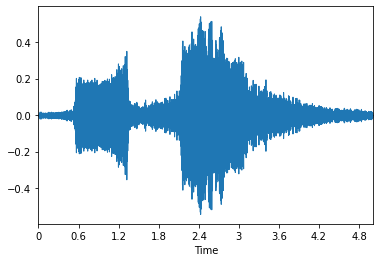

In [4]:
waveplot(y, sr)

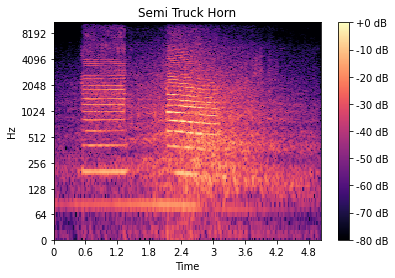

In [5]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set(title='Semi Truck Horn')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [6]:
D.shape

(1025, 217)

In [7]:
truck_mfcc = librosa.feature.mfcc(y, sr)
truck_mfcc.shape

(20, 217)

With sounds vectorized, we can compare them to known, labeled movie sound effects. This would require some manual “hard-coding” of a lookup dictionary with many different sounds. But think back to the truck effect, this specific sound has been used in dozens of movies and TV shows. Often audio engineers will reuse sounds or draw from pre-made sound libraries, rather than create their own from scratch. Indeed, TE047603 was included in a sound effect pack released in the 90’s by The Hollywood Edge, a company that produces stock sound effects.

There are only so many common stock sound effects to process and label, with each of those contributing valuable clues to a scene’s context. Because of the substantial effort of cataloging these sound effects, Moviegoer development (for now) will continue without this implementation, and it will be reserved for future effort.